In [28]:
ed = [pd.read_csv(
    'shikoku_electricity_%d.csv' % year,
    skiprows=3,
    names=['DATE', 'TIME', 'consumption'],
    parse_dates={'date_hour': ['DATE', 'TIME']},
    index_col = "date_hour")
    for year in [2012, 2013, 2014, 2015, 2016]
]

In [29]:
ed

[                     consumption
 date_hour                       
 2012-07-02 00:00:00          261
 2012-07-02 01:00:00          256
 2012-07-02 02:00:00          269
 2012-07-02 03:00:00          289
 2012-07-02 04:00:00          297
 ...                          ...
 2012-12-31 19:00:00          375
 2012-12-31 20:00:00          364
 2012-12-31 21:00:00          350
 2012-12-31 22:00:00          333
 2012-12-31 23:00:00          348
 
 [4392 rows x 1 columns],                      consumption
 date_hour                       
 2013-01-01 00:00:00          351
 2013-01-01 01:00:00          356
 2013-01-01 02:00:00          361
 2013-01-01 03:00:00          355
 2013-01-01 04:00:00          340
 ...                          ...
 2013-12-31 19:00:00          335
 2013-12-31 20:00:00          327
 2013-12-31 21:00:00          312
 2013-12-31 22:00:00          301
 2013-12-31 23:00:00          310
 
 [8760 rows x 1 columns],                      consumption
 date_hour                  

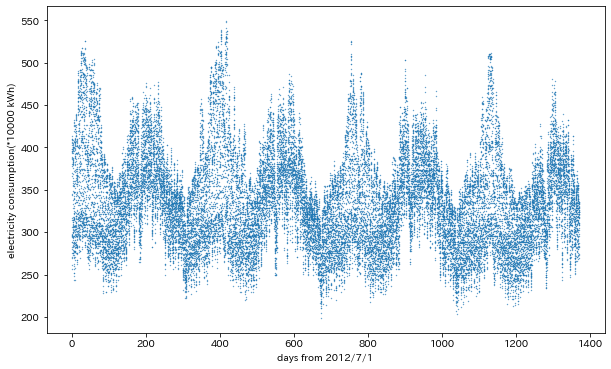

In [34]:
elec_data = pd.concat(ed)

# -- 可視化 --
import matplotlib.pyplot as plt
%matplotlib inline

# 画像のサイズを設定する
plt.figure(figsize=(10, 6))

# 時系列グラフ生成
delta = elec_data.index - pd.to_datetime('2012/07/01 00:00:00')
elec_data['time'] = delta.days + delta.seconds / 3600.0 / 24.0

plt.scatter(elec_data['time'], elec_data['consumption'], s=0.1)
plt.xlabel('days from 2012/7/1')
plt.ylabel('electricity consumption(*10000 kWh)')

# グラフ保存
plt.savefig('7-4-1-1-graph.png')


In [42]:
DT = ["2019-11-9 00:00:00","2019-11-9 01:00:00","2019-11-9 02:00:00"]
d = pd.to_datetime(DT)
pdt =pd.DataFrame(d)
pdt.columns=["data_hour"]
pdt

,data_hour
0,2019-11-09 00:00:00
1,2019-11-09 01:00:00
2,2019-11-09 02:00:00


In [43]:
C = ["123","124","125"]
pdc = pd.DataFrame(C)
pdc.columns=["AAA"]
pdc

,AAA
0,123
1,124
2,125


In [49]:
pdt = pdt.join(pdc).set_index("data_hour")

ValueError: columns overlap but no suffix specified: Index(['AAA'], dtype='object')

In [50]:
pdt

,data_hour,AAA
0,2019-11-09 00:00:00,123
1,2019-11-09 01:00:00,124
2,2019-11-09 02:00:00,125


In [51]:
dlta =pdt.index -pd.to_datatime("2019/11/08 00:00:00")
dlta

AttributeError: module 'pandas' has no attribute 'to_datatime'

In [52]:
import pandas as pd

df1 = pd.DataFrame({'A' : [ 'A0', 'A1', 'A2', 'A3'],'B' : [ 'B0', 'B1', 'B2', 'B3']},index = [0, 1, 2, 3])                  

df2 = pd.DataFrame({'A' : ['A4','A5', 'A6'], 'C' : ['C4','C5', 'C6']}, index = [4,5,6])

In [54]:
df1

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [55]:
df2

,A,C
4,A4,C4
5,A5,C5
6,A6,C6


In [57]:
df3 = pd.concat([df1, df2])

/Users/shiba-t/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [58]:
df3

,A,B,C
0,A0,B0,NaN
1,A1,B1,NaN
2,A2,B2,NaN
3,A3,B3,NaN
4,A4,NaN,C4
5,A5,NaN,C5
6,A6,NaN,C6
